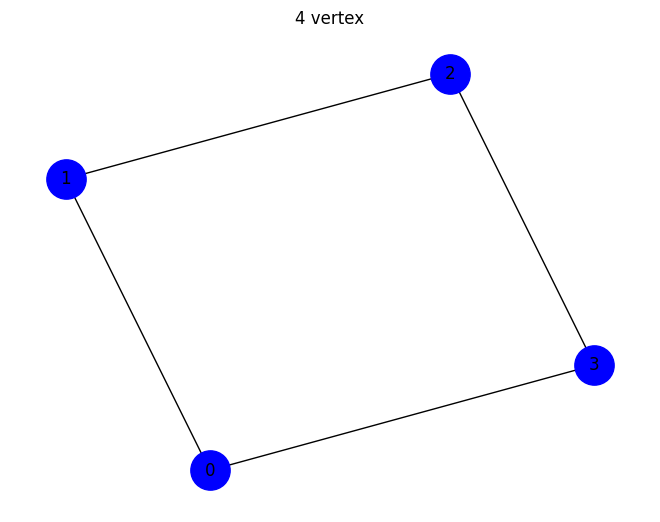

 Minimum Vertex Cover Nodes for 4 Nodes: [1, 3]


In [6]:
import networkx as nx
import matplotlib.pyplot as plt
from qiskit_algorithms import QAOA
from qiskit_algorithms.optimizers import COBYLA
from qiskit_aer.primitives import Sampler
from qiskit_optimization import QuadraticProgram
from qiskit_optimization.algorithms import MinimumEigenOptimizer
from qiskit_optimization.converters import QuadraticProgramToQubo

#  creating the graph
graph = nx.Graph()
graph.add_edges_from([(0, 1), (1, 2), (2, 3), (3, 0)])  
nx.draw(graph, with_labels=True, node_color='blue', node_size=800)
plt.title("4 vertex")
plt.show()


qp = QuadraticProgram(name="Minimum Vertex Cover")
for i in range(4):
    qp.binary_var(name=f"x{i}")
for u, v in graph.edges():
    qp.linear_constraint({f"x{u}": 1, f"x{v}": 1}, sense=">=", rhs=1)
qp.minimize(linear={f"x{i}": 1 for i in range(4)})

qubo = QuadraticProgramToQubo().convert(qp)

qaoa = QAOA(optimizer=COBYLA(), reps=1, sampler=Sampler())
solver = MinimumEigenOptimizer(qaoa)
result = solver.solve(qubo)

cover_nodes = [i for i in range(4) if result.x[i] > 0.5]
print(" Minimum Vertex Cover Nodes for 4 Nodes:", cover_nodes)


